# 3 P-bit OR-gate Python Simulation
This notebook simulates and plots the floating and clamping states of a 3 P-bit OR-gate. This is given by the following formulas: 
$$
m_i(t)=\textrm{sgn}\Big[\textrm{rand}(-1,1)+\tanh(I_i(t))\Big]
$$
$$
I_i(t)=I_0(h_i+\sum_j J_{ij}m_j(t))
$$
The output $m$ is converted to binary before plotting the bars. (The equations describe a bipolar system)

The weight matrix $\mathbf{J}$ and bias vector $\mathbf{h}$ is given by an Ising Hamiltonian formulation:
$$
H_{Ising}=\sum_i h_i\sigma_i+\sum_{\langle i,j \rangle} J_{ij}\sigma_i\sigma_j
$$
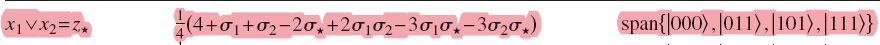

Meaning the matrix and vector is:
$$
\mathbf{J}=
\begin{pmatrix}
    0 & -2 & 3 \\
    -2 & 0 & 3 \\
    3 & 3 & 0
\end{pmatrix}, \quad\quad
\mathbf{h}=(-1,-1,2)
$$

Found folder: C:\repositories\ProbabilisticComputing\Circuit_Library
Processing case: Floating State (h_bipolar = [-1.0, -1.0, 2.0]) with selected bits [0, 1, 2]
Saved plot: Plots/OR_Floating_State.png


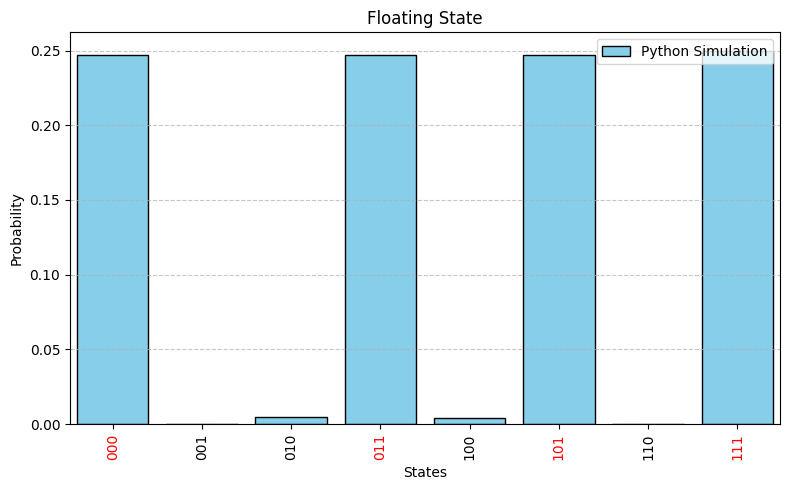

Processing case: A=0,B=0 (h_bipolar = [-16.0, -16.0, 2.0]) with selected bits [0, 1, 2]
Saved plot: Plots/OR_A=0,B=0.png


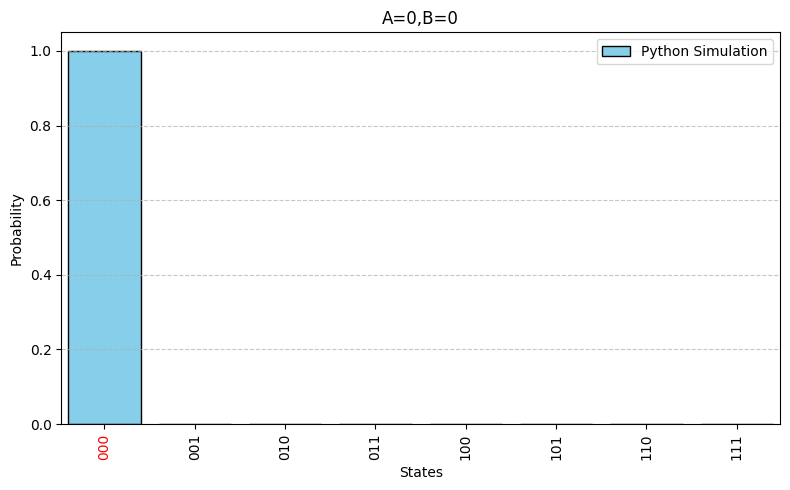

Processing case: A=1 (h_bipolar = [15.0, -16.0, 2.0]) with selected bits [0, 1, 2]
Saved plot: Plots/OR_A=1.png


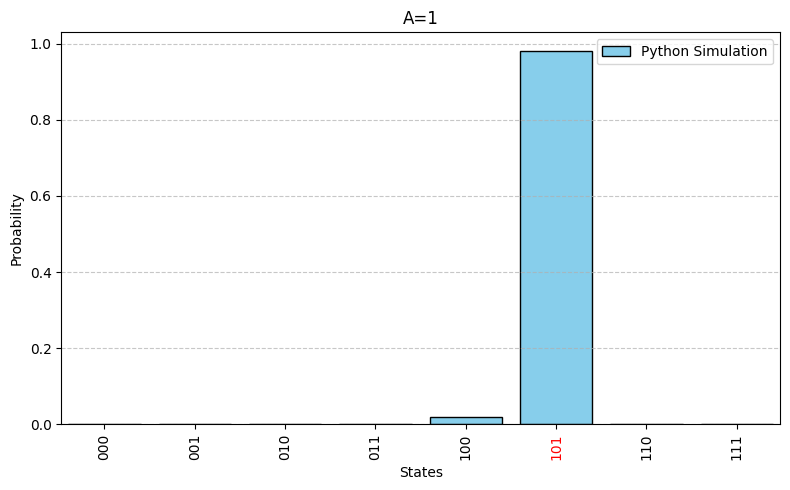

Processing case: B=1 (h_bipolar = [-16.0, 15.0, 2.0]) with selected bits [0, 1, 2]
Saved plot: Plots/OR_B=1.png


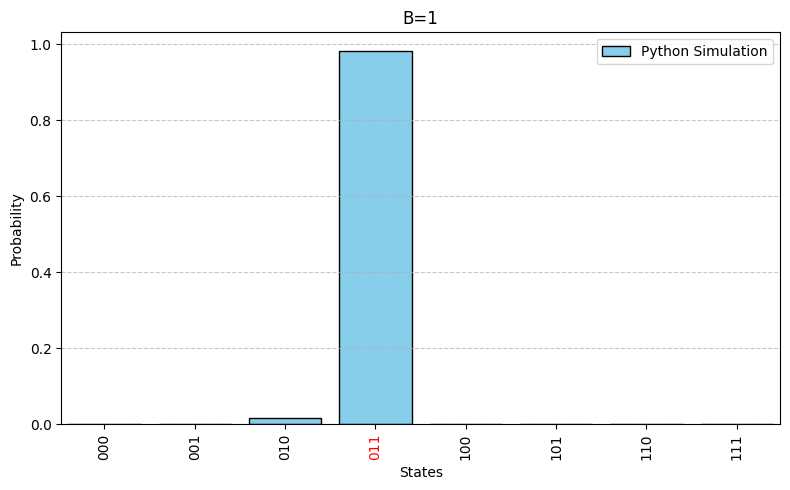

Processing case: A=1,B=1 (h_bipolar = [15.0, 15.0, 2.0]) with selected bits [0, 1, 2]
Saved plot: Plots/OR_A=1,B=1.png


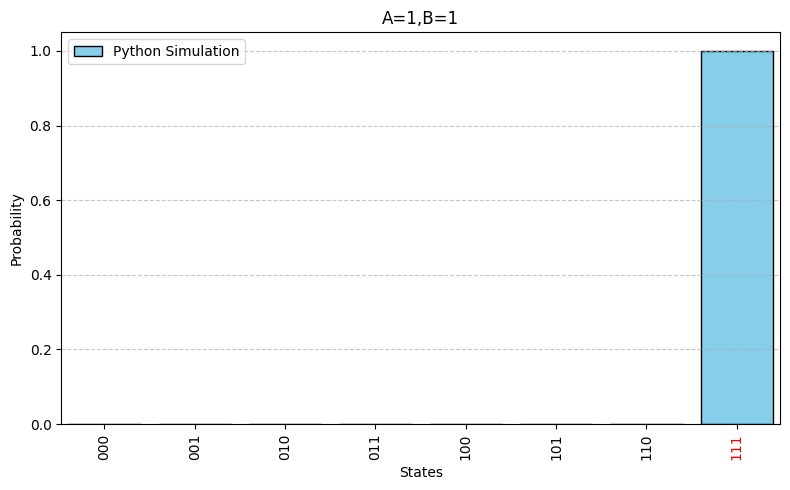

Processing case: C=0 (h_bipolar = [-1.0, -1.0, -16.0]) with selected bits [0, 1, 2]
Saved plot: Plots/OR_C=0.png


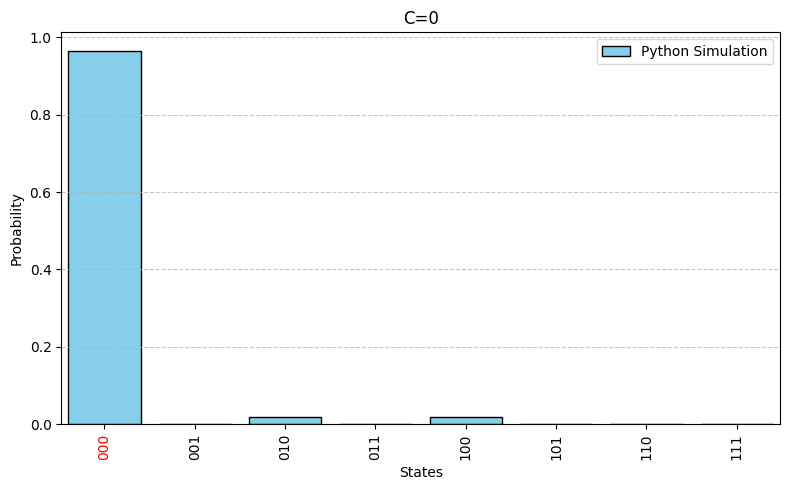

Processing case: C=1 (h_bipolar = [-1.0, -1.0, 15.0]) with selected bits [0, 1, 2]
Saved plot: Plots/OR_C=1.png


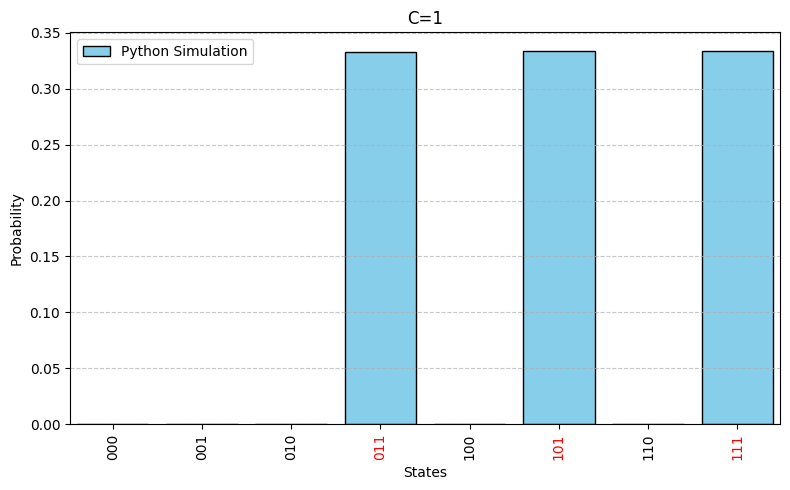

In [1]:
from Scripts import simulate_p_circuit as simulate_p_circuit
import Scripts.CustomScripts as CS

J, h, node_order = CS.load_npz_data("OR.npz", target_folder="Circuit_Library")

# Define your target_names dictionary
target_names = {
    "Floating State": {
    },
    "A=0,B=0": {
        "A":"push0",
        "B":"push0"
    },
    "A=1": {
        "A":"push1",
        "B":"push0",
    },
    "B=1": {
        "A":"push0",
        "B":"push1"
    },
    "A=1,B=1": {
        "A":"push1",
        "B":"push1"
    },
    "C=0": {
        "C":"push0"
    },
    "C=1": {
        "C":"push1"
    },
}

# Get the updated configurations:
configured_h = CS.update_all_configurations(target_names, h, node_order)

selected_bits = {
    "Floating State": ["A","B","C"], 
    "A=0,B=0": ["A","B","C"],  
    "A=1": ["A","B","C"],  
    "B=1": ["A","B","C"],
    "A=1,B=1": ["A","B","C"],    
    "C=0": ["A","B","C"],  
    "C=1": ["A","B","C"],  
}
simulate_p_circuit.plot_probabilities(num_steps=100000, savefig=True, save_csv=False,J_bipolar=J, node_order=node_order,
                                      h_bipolar_dict=configured_h, use_python=True, use_boltzmann=False, 
                                      filename="OR", figWidth=8, selected_bits=selected_bits)